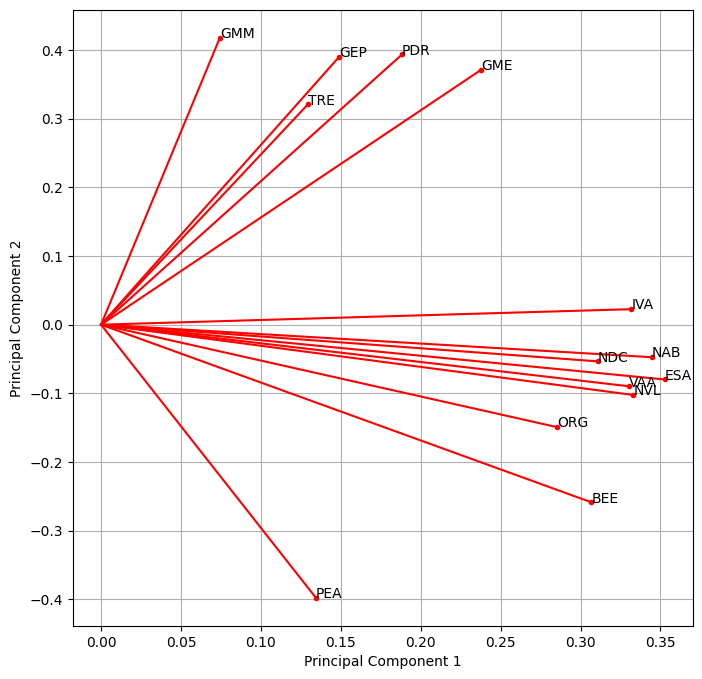

In [ ]:
# loading graph with eigenvector

from csv import reader
import matplotlib.pyplot as plt
from data import load_config

eigen_vectors = []

config = load_config()
codes = [c['id'] for c in config]

with open('./data/eigen-vectors.csv', encoding='utf-8') as file:
    csv_reader = reader(file)
    for line in csv_reader:
        if line[0] != 'PC 1':
            eigen_vectors.append([float(line[0]), float(line[1])])

plt.figure(figsize=(8, 8))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add variable labels to the plot
for i, contribution in enumerate(eigen_vectors):
    plt.plot(contribution[0], contribution[1], 'r.')
    plt.plot([0, contribution[0]], [0, contribution[1]], 'r-')
    plt.annotate(codes[i], (contribution[0], contribution[1]))

# Fix x-axis between -1 and 1 is important for better visualization
# plt.xlim(-1,1)
# plt.ylim(-1,1)

# Add grid in the background
plt.grid(True)

# Display the chart
plt.show()

[[0.2569361069752264, 0.06364783374275958, 0.08251302795834267, 0.07293080068072919, 0.07119800517255215, 0.05738520825596528, 0.04757874997494376, 0.033689961660136304, 0.032898489102186276, 0.011670076184819293, 0.004291805010680204, 0.010018848805102905, 0.0040608543104593805, 0.0018421604536229558], [-0.058192363654709554, -0.18838286716548214, -0.022425943392333964, -0.02243367403627603, -0.00979767510794923, -0.009874963903468363, -0.04012748532234481, -0.01762534829827046, 0.0022352902182464474, 0.024389288389595812, 0.024127664756623517, 0.015639356041998984, 0.010632951180438525, 0.004567250381459368], [0.036427286021559084, -0.15455993739062904, 0.0009304260428724838, -0.0056190686657370086, -0.0025481040899709303, 0.013658167915435376, -0.005333466902215876, 0.001320407193196054, 0.021000558541538636, 0.006171985288444047, -0.014957484581166641, -0.011599543832254613, -0.01285935245086961, 0.00969856706745417], [-0.04742667008652465, -0.04787608640801031, 0.00032869008482092

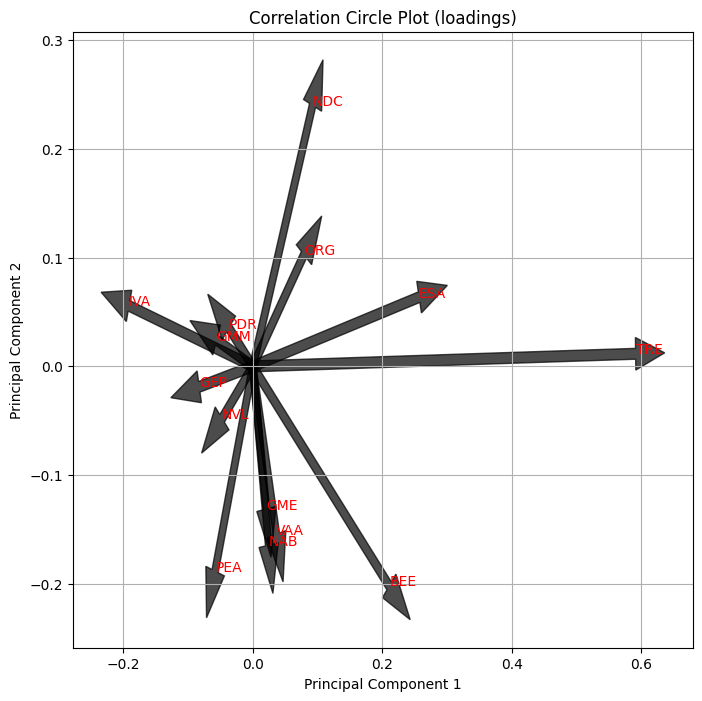

In [ ]:
# loading graph with loading.

from csv import reader
import matplotlib.pyplot as plt
from data import load_config
from math import sqrt

eigen_vectors = []
explained_variance = []

config = load_config()
codes = [c['id'] for c in config]

with open('./data/explained-variance.csv', encoding='utf-8') as file:
    csv_reader = [l for l in reader(file)]
    for element in csv_reader[1]:
        explained_variance.append(float(element))

with open('./data/eigen-vectors.csv', encoding='utf-8') as file:
    csv_reader = reader(file)
    for line in csv_reader:
        if line[0] != 'PC 1':
            row = []
            for element in line:
                row.append(float(element))
            eigen_vectors.append(row)

explained_variance_diagonal = [[0] * len(explained_variance)] * len(explained_variance)
explained_variance_diagonal = []
for i, value in enumerate(explained_variance):
    row = [0] * len(explained_variance)
    row[i] = value
    explained_variance_diagonal.append(row)

# TODO: Is it okay to use explained variance?

loadings = []
n = len(explained_variance)

for i in range(n):
    row = [0] * n
    loadings.append(row)

for i in range(n):
    for j in range(n):
        total = 0
        for k in range(n):
            total += eigen_vectors[i][k] * sqrt(explained_variance_diagonal[k][j])
        loadings[i][j] = total

# Pas sur que le calcul soit le bon.
# for contribution in eigen_vectors:
#     loadings.append([contribution[0] * sqrt(explained_variance[0]), contribution[1] * sqrt(explained_variance[1])])

print(loadings)
print(eigen_vectors)

plt.figure(figsize=(8, 8))
plt.title('Correlation Circle Plot (loadings)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add variable labels to the plot
for i, loading in enumerate(loadings):

    # Add the name of the variable near the arrow
    plt.annotate(codes[i], (loading[0], loading[1]), color='red')
    
    # Add an arrow representing the variable on the new axis
    plt.arrow(0, 0, loading[0], loading[1], color='black', alpha=0.7, width=0.01)

# Fix x-axis between -1 and 1 is important for better visualization
# plt.xlim(-1,1)
# plt.ylim(-1,1)

# Add grid in the background
plt.grid(True)

# Display the chart
plt.show()